### Done: MD589, section 147 -- 323

1. Select blobs with area in (200, 3000) for blob matching.
2. Collect typical blob by local blob matching
3. Collect false typical blob by matching blobs with blobs far away in the neighbouring sections 
    - Set a cut off radius and compare this blob with all the blobs outside this radius on the same section
    - Collect all the matched pairs that have similarity higher than the preset threshold
4. Analysis

### Typical Ratio

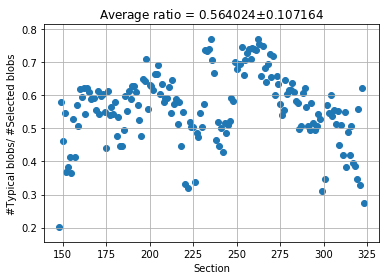

This figure shows the **typical ratio** defined as the ratio between the number of typical blobs found and the number of selected blobs. The ratio is low for the first and the last point (correspond to section 148 and section 323) and that's because they can only find similar blob in one section ( section 147 and section 188 are not included in the loaded data). Given similarity threshold 0.9 and uniform weights on area and eccentricity, about 56% of the selected blobs are found 'typical'. Further work can be figuring out the reason for large section-wise fluctuation.

Assuming that blobs at position $\vec r$ follows a distribution $F(\vec r, \vec{\Phi})$, where $\vec{\Phi}$ is a vector of features that describe the blobs in the space of $V$. $\vec\Phi$ can be (area, eccentricity, orientation, ...) Given a blob at $\vec r$, The blob matching algorithm does the following: 
1. Given a blob at position $\vec r$ from the data, collect blobs inside a ball $B(\vec r, \epsilon)$ whose raidus is $\epsilon$, denoted as set $\{blob_i| \vec r_i \in B(\vec r, \epsilon)\}$. This set can be viewed as a set of samples from distribution $F(\vec r, \vec{\Phi})$
2. Let $\vec\phi$ be a feature vector in the subspace of $V$ and define $d(\vec x,\vec y)$ be a function measures the 'distance' between two vectors $\vec x$ and $\vec y$. The distance between feature vectors measures the similarity between blobs. 
3. Compute the similarity between blob at $\vec r$ and all the blobs in $B(\vec r,\epsilon)$ and get a set of similarities $S(\vec r, \epsilon) = \{d(\vec\phi_i, \vec \phi) | \vec r_i \in B(\vec r, \epsilon) \}$
3. If any of the element of set $S(\vec r, \epsilon)$ is grater than a manually chosen threshold, the blob at $\vec r$ is called 'typical' and stored. 

If the values of the features of the blob at $\vec r$ is rare, it's less likely for it to find similar blobs nearby. Therefore, the 'typical' blobs should form a 'narrower' distribution $f(\vec r, \vec{\Phi})$.

### Area histograms comparison

Information entropy of Normed_Typical = 2.362551
Information entropy of Normed_Selected = 2.550370


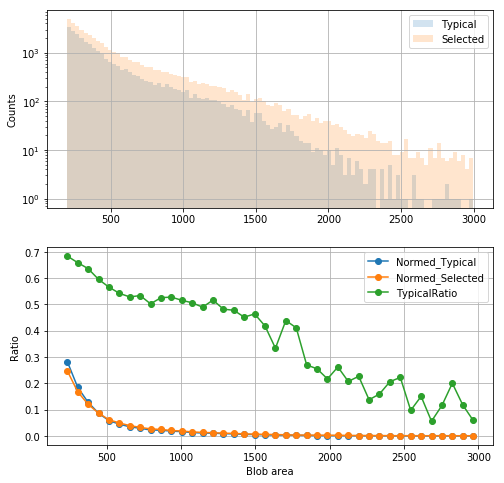

The upper subfigure is the histogram of selected blobs and typical blobs in section 147 - 323. The blob matching algorithms eliminate large proportion of large blobs. The lower subfigure shows the normalized distribution of typical blob area and selected blob area, along with the typical ratio defined above. No significant difference between two distribution can be observed. 

Information entropy of Normed_Typical7N = 2.624963
Information entropy of Normed_Selected = 2.759452


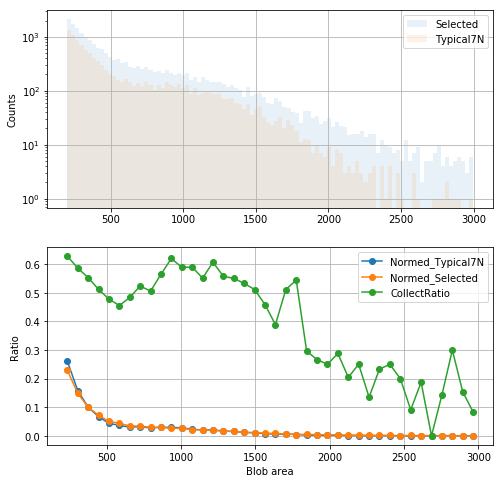

1. The upper subfigure is the histogram of selected blobs and typical blobs in all the sections containing structure 7N (denote as 7N sections). 
2. The lower subfigure shows the normalized distribution of typical blob in 7N sections area and selected blob area, along with the typical ratio defined above. 
3. In 7N sections, larger proportion of blob of area around 500 pixels are eliminated. 


### Eccentricity 

Information entropy of Normed_Typical = 3.124441
Information entropy of Normed_Selected = 3.401011


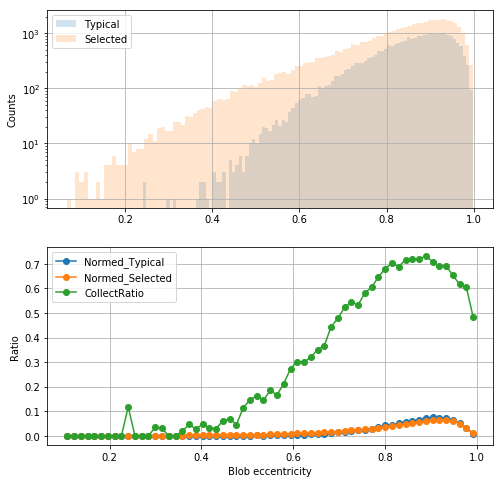

Same as above, but for eccentricity

Information entropy of Normed_Typical7N = 3.110869
Information entropy of Normed_Selected = 3.392850


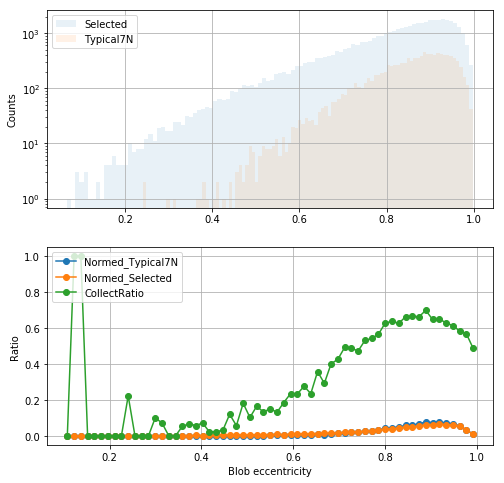

1. Same as above, but for eccentricity
2. Quite smooth, does not contain peak in the corresponding figure for area. 
3. Eccentricity is one of the features for determining 'typical' blobs. The resulting typical blobs does not have significantly different distribution from the selected blobs. 

The following are the distributions for features that are not used for determining the similarity. 

### Compactness

Information entropy of Normed_Typical = 2.210811
Information entropy of Normed_Selected = 2.314610


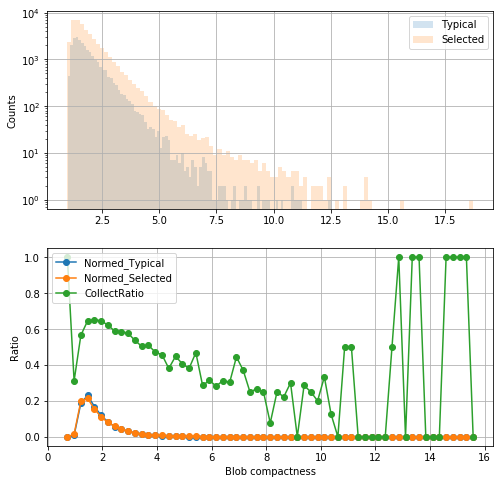

I found compactness a good feature to discriminate blobs of single cell against blobs consist of many cells. The more complex the boundary is, the larger the compactness becomes. According to experience, the typical range of compactness of blobs from signle cells is (1, 2.5). Though the algorithms does not directly select on this feature, many blobs with complex boundary(compactness > 5) are eliminated. The ratios = 1 at the large compactness end are due to the regularization factor we add to avoid 'divid by 0' error.  

Information entropy of Normed_Typical7N = 2.236440
Information entropy of Normed_Selected = 2.324312


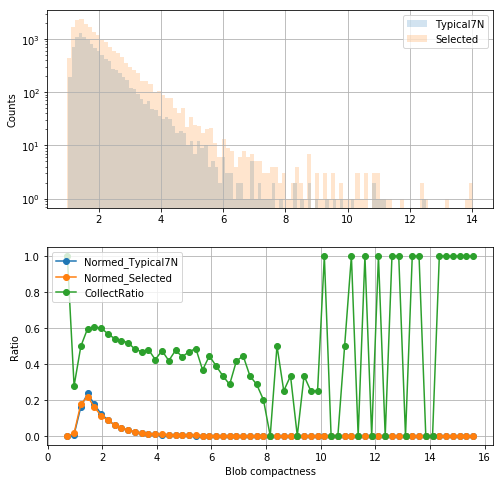

In [240]:
tempProp = 'compactness'
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.hist(data_typical_blobs_properties_dd_7N[tempProp],bins=100, alpha=0.2, label='Typical7N');
plt.hist(data_selected_blob_props_flatten_dic7N[tempProp],bins=100, alpha=0.2, label='Selected');
plt.legend(loc='upper right')
plt.grid()
plt.ylabel('Counts')
plt.yscale('log')
plt.subplot(2,1,2)
temp_num_bin = 61
temp_range = (0.6,15.7)

temp1 = np.histogram(data_typical_blobs_properties_dd_7N[tempProp], bins=temp_num_bin,range=temp_range)
temp2 = np.histogram(data_selected_blob_props_flatten_dic7N[tempProp], bins=temp_num_bin,range=temp_range)
tempLabel1 = 'Normed_Typical7N'
tempLabel2 = 'Normed_Selected'
temp1_norm = temp1[0].astype(np.float)/np.sum(temp1[0]) + 10**(-16)
temp2_norm = temp2[0].astype(np.float)/np.sum(temp2[0]) + 10**(-16)
print('Information entropy of %s = %f'%(tempLabel1, np.dot(temp1_norm, -np.log(temp1_norm))))
print('Information entropy of %s = %f'%(tempLabel2, np.dot(temp2_norm, -np.log(temp2_norm))))

plt.plot(scipy.signal.convolve(temp1[1],np.ones([2,])*0.5,mode='valid'),(temp1[0]+0.000000000001)/(np.sum(temp1[0]) + 0.000000000001), label=tempLabel1, linestyle='-', marker='o')
plt.plot(scipy.signal.convolve(temp1[1],np.ones([2,])*0.5,mode='valid'),(temp2[0]+0.000000000001)/(np.sum(temp2[0]) + 0.000000000001), label=tempLabel2,linestyle='-', marker='o')
plt.plot(scipy.signal.convolve(temp1[1],np.ones([2,])*0.5,mode='valid'),(temp1[0]+0.000000000001)/(temp2[0] + 0.000000000001), label='CollectRatio',linestyle='-', marker='o')
plt.legend(loc='upper left')
plt.xlabel('Blob ' + tempProp )
plt.ylabel('Ratio')
plt.grid()

Same as above, for compactness distribution of typical blobs and selected blobs in 7N sections

### Orientation

Information entropy of Normed_Typical = 3.609342
Information entropy of Normed_Selected = 3.629600


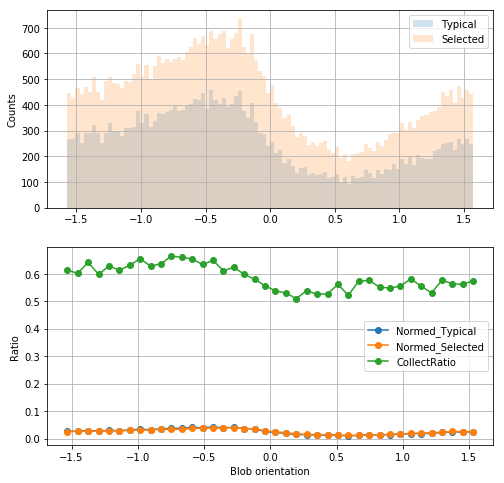

Basically the same typical ratio for all different orientations, indicating that the matching in area and eccentricity does not effect the distribution of orientation. 
The orientation distribution suggest that the blobs in the area around 7N have preference orientation. 

Information entropy of Normed_Typical7N = 3.594153
Information entropy of Normed_Selected = 3.613314


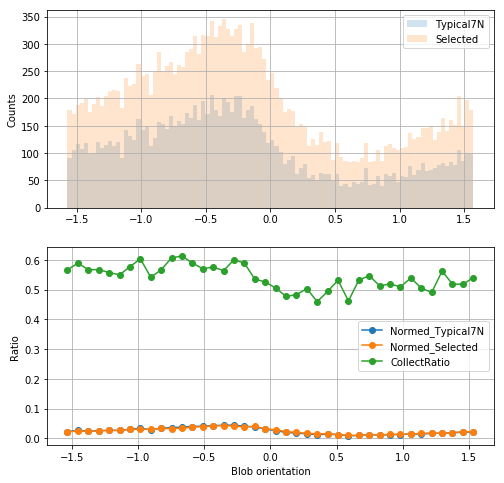